In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train=pd.read_csv("Blackrock.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,720.000000,723.539978,703.770020,712.039978,692.085815,540800
1,2023-01-04,719.650024,727.479980,713.400024,721.900024,701.669434,710200
2,2023-01-05,713.030029,717.169983,701.210022,701.239990,681.588440,686700
3,2023-01-06,713.419983,738.559998,710.469971,738.000000,717.318237,1215700
4,2023-01-09,742.210022,762.809998,741.750000,752.989990,731.888123,1102800


In [3]:
training_set = dataset_train.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])

shape is =(251, 1)
[[720.      ]
 [719.650024]
 [713.030029]
 [713.419983]
 [742.210022]]


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[ 0.59920475],
       [ 0.59156332],
       [ 0.44702135],
       [ 0.45553566],
       [ 1.08414174],
       [ 1.24615078],
       [ 1.42890252],
       [ 1.54156615],
       [ 1.18064832],
       [ 1.2581593 ],
       [ 1.2758449 ],
       [ 0.98807095],
       [ 0.92169561],
       [ 1.07671754],
       [ 1.05182628],
       [ 1.10357313],
       [ 1.2542293 ],
       [ 1.29222051],
       [ 1.26318072],
       [ 1.2542293 ],
       [ 1.33545171],
       [ 1.55772454],
       [ 1.2542293 ],
       [ 1.18828973],
       [ 0.93326701],
       [ 0.93479555],
       [ 1.01667362],
       [ 0.42955296],
       [ 0.6616501 ],
       [ 0.8996429 ],
       [ 0.58064625],
       [ 0.39854885],
       [ 0.34723912],
       [ 0.29636518],
       [ 0.06972657],
       [ 0.10291492],
       [-0.2180474 ],
       [ 0.05073097],
       [-0.15407348],
       [-0.20538322],
       [-0.42700038],
       [ 0.02300116],
       [-0.09184668],
       [-0.09097246],
       [-0.34796086],
       [-0

In [5]:
X_train = []
Y_train = []
for i in range(50,250):
    X_train.append(scaled_training_set[i-50:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(200, 50)
(200,)


In [6]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(200, 50, 1)

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1))

In [9]:
from keras.optimizers import RMSprop
regressor.compile(optimizer=RMSprop(), loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 200, batch_size = 16)

Epoch 1/200

13/13 [==============================] - 6s 50ms/step - loss: 0.7961
Epoch 2/200
13/13 [==============================] - 1s 45ms/step - loss: 0.4085
Epoch 3/200
13/13 [==============================] - 1s 46ms/step - loss: 0.3497
Epoch 4/200
13/13 [==============================] - 1s 46ms/step - loss: 0.3045
Epoch 5/200
13/13 [==============================] - 1s 46ms/step - loss: 0.2514
Epoch 6/200
13/13 [==============================] - 1s 46ms/step - loss: 0.2393
Epoch 7/200
13/13 [==============================] - 1s 47ms/step - loss: 0.2835
Epoch 8/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1789
Epoch 9/200
13/13 [==============================] - 1s 47ms/step - loss: 0.1675
Epoch 10/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1860
Epoch 11/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1673
Epoch 12/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1396
Epoch 13/200
13/13 [====

13/13 [==============================] - 1s 45ms/step - loss: 0.0574
Epoch 99/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0652
Epoch 100/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0537
Epoch 101/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0561
Epoch 102/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0617
Epoch 103/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0529
Epoch 104/200
13/13 [==============================] - 1s 44ms/step - loss: 0.0553
Epoch 105/200
13/13 [==============================] - 1s 44ms/step - loss: 0.0515
Epoch 106/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0582
Epoch 107/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0482
Epoch 108/200
13/13 [==============================] - 1s 52ms/step - loss: 0.0523
Epoch 109/200
13/13 [==============================] - 1s 56ms/step - loss: 0.0665
Epoch 110/200
13/13

13/13 [==============================] - 1s 46ms/step - loss: 0.0605
Epoch 197/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0477
Epoch 198/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0524
Epoch 199/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0500
Epoch 200/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0498


In [14]:
dataset_test = pd.read_csv("Blackrock.csv")
predicted_stock_price = dataset_test.iloc[:,1:2].values

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(50, 70):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
Y_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 32ms/step


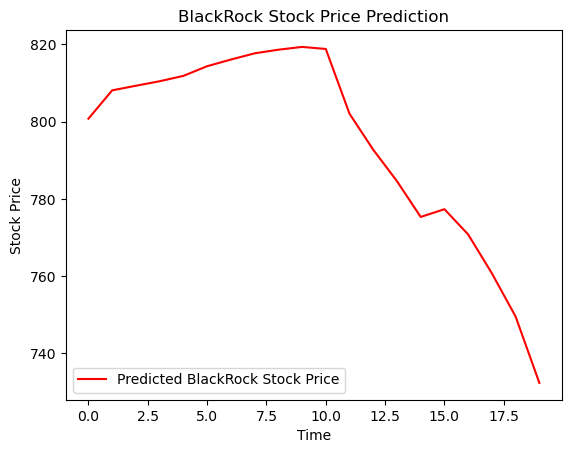

In [13]:
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted BlackRock Stock Price')
plt.title('BlackRock Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()